# Assignment 5
## Decision Trees and Random Forests for Regression, Part 1

### About this notebook

The general description and instructions as well as questions for the walk through Part 1 of the task (this notebook) are found in the Assignment description in Canvas!


In [1]:
# YOU DON'T HAVE TO RUN THIS IF EVERYTHING IS ALREADY INSTALLED CORRECTLY
!pip3 install --upgrade pip
!pip3 install graphviz
!pip3 install dtreeviz
!pip3 install numpy scipy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.8 MB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 11.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 23.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 29.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 31.9 MB/s e

## Dataset(s)

**Step 0:** First, load the dataset. Ultimately, you should be working with the California housing data, but for quicker test runs, it might help to first start out with the Diabetes data.

In [21]:
#run time 0.8s

from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from ConceptDataRegr import ConceptDataRegr
from sklearn.model_selection import train_test_split 

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#test_case = 'diabetes'
test_case = 'california'

if test_case == 'california':
    dataset = fetch_california_housing()
elif test_case == 'diabetes':
    dataset = load_diabetes()
else:
    raise ValueError('Unknown test case')

X = dataset.data
y = dataset.target


**Step 1:** Get some information about the dataset you're looking at

In [22]:
if test_case == 'california' :
    print("target:", list(dataset.target_names))
    print("features:", list(dataset.feature_names))
    print("description:", dataset.DESCR)


target: ['MedHouseVal']
features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
description: .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for Califor

**Step 2:** Split the data into train, validation and test sets.

In [4]:
#run time 0.7s

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15
X = dataset.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

## Decision Tree Regressor

Run the cells below and inspect the output. Use the documentation where needed. Be prepared to answer "random" questions posed by the TA.

In [5]:
#run time 0.7s

from sklearn.tree import DecisionTreeRegressor

regressor1 = DecisionTreeRegressor(random_state=0)

**Step 3:** Now let's examine the decision tree. 
Check out [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
and [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision+tree)
to learn about those tools.

In [6]:
#run time 1.8s

from sklearn.model_selection import cross_val_score

cross_val_score(regressor1, X_train, y_train, cv=10)

#negative scores -> model's performance is worse than a baselines. Common for regressions, Larger negative indicate better regression problems
#positive scores -> model have better classification performance. For accuracy, a score close to 1 indicate accurate predictions. 

#Score on the validation sets

array([-0.02144221,  0.0614295 ,  0.09449354, -0.05130063,  0.36838284,
       -0.55354206, -0.00447535, -0.14397523,  0.25445472,  0.12892033])

#### Cross-validation is a technique used to assess the performance and generalization ability of a machine learning model. Each value in the array represents the performance (e.g., accuracy, mean squared error, etc.) of the model on a different fold.


In [7]:
#run time 0.3s

regressor1.fit(X_train, y_train)
regressor1.score(X_test, y_test) 

#Score on the test set


-0.057750608640022794

## ANSWER:
#### The score is a measure of how well the predictions of the model match the actual data.
#### Negative value indicate that the model is performing poorly on the test set

## Decision Tree Parameters

**Step 4:** Let's have a look at two other parameters, max_depth and min_samples_leaf.
How do you interpret the following numbers?

In [8]:
#run time 0.2s

regressor2 = DecisionTreeRegressor(max_depth=1, random_state=0)
cross_val_score(regressor2, X_train, y_train, cv=10)

#Positive score: model performs better, 1.0 means perfect predictions and the model is able to explain a signification portion of the variance in the target variable
# Cross_val, performance on each fold of the dataaset

array([ 0.06376428,  0.14919576, -0.01133969,  0.06887429,  0.25102598,
        0.15290758,  0.28438258,  0.24414713,  0.24351975,  0.20996688])

In [9]:
#run time 0.1s

regressor2.fit(X_train, y_train)
regressor2.score(X_test, y_test)

#The score is OK, and explains 12.28% of the variability in the target varluable on the test set.

0.12280882071603205

In [10]:
#run time 1.2s

regressor3 = DecisionTreeRegressor(min_samples_leaf=1, random_state=0) 
cross_val_score(regressor3, X_train, y_train, cv=10)
# Increased minimum sample leafes
# Model performs better, smaller tree size -> larger constraint, r
# Overfitting reduction due to regularization which helps generalization for new unseen data
# Smaller leaves might be more prone to fitting noise

array([-0.02144221,  0.0614295 ,  0.09449354, -0.05130063,  0.36838284,
       -0.55354206, -0.00447535, -0.14397523,  0.25445472,  0.12892033])

In [11]:
#run time 0.1s

regressor3.fit(X_train, y_train)
regressor3.score(X_test, y_test)

#regressor2 allows for  more flexibility in the three structure, capturing more compelx relationship in data, maybe also capturing noise
#regressor3 generalise better by having more regularised tree structure, preventing overfitting, but might lead to underfitting if the dataset is complex.

#Cross-validation scores provide an estimate of the model's performance, but the ultimate evaluation should be on the test set. 

#The score is an indicator on how well the model generalizes to new, unseen data.


-0.057750608640022794

## Decision Tree Visualization

**Step 5:** The next cells give examples how to visualize regressor2 and regressor3.

In [23]:
#run time 0.2s

from sklearn import tree
import graphviz
from IPython.display import Image

dot_data = tree.export_graphviz(regressor2, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor2")
Image("decision_tree_regressor2.png")

ValueError: Length of feature_names, 8 does not match number of features, 10

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0364028 to fit


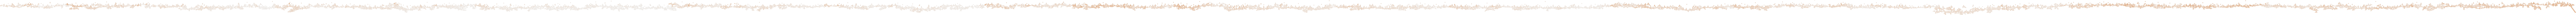

In [13]:
#run time 4.8s

dot_data = tree.export_graphviz(regressor3, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor3")
Image("decision_tree_regressor3.png")

**Step 6:** Another nice way to visualize the decision trees nicely is with dtreeviz. To make these plots it takes quite some time, so we recommend to use this visualization tool for trees with few nodes. 

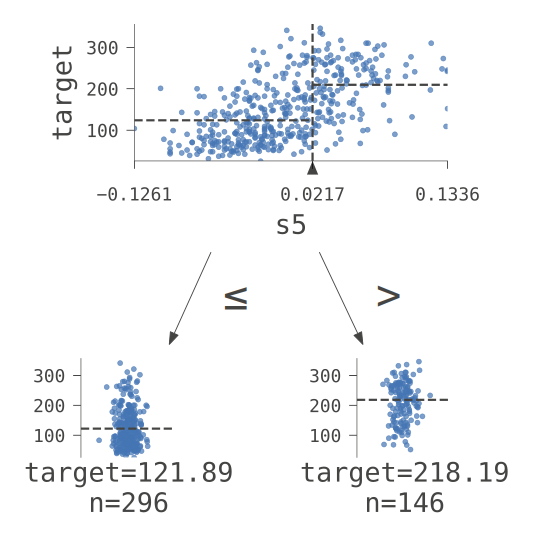

In [57]:
# run time 6.9s

import dtreeviz

viz = dtreeviz.model(
    regressor2, X, y, target_name="target", feature_names=dataset.feature_names
)
# viz.view()
# this opens the visualization in a new window. If you want to display the output inside the notebook use:
viz.view(fontname="monospace", scale=3)
# if you want to store the output in a file use:
# viz.save("dtreeviz.svg")
# instead

## Explainability

**Step 7:** If you want to visualize (explain) the decision path for one prediction, you can also use dtreeviz:

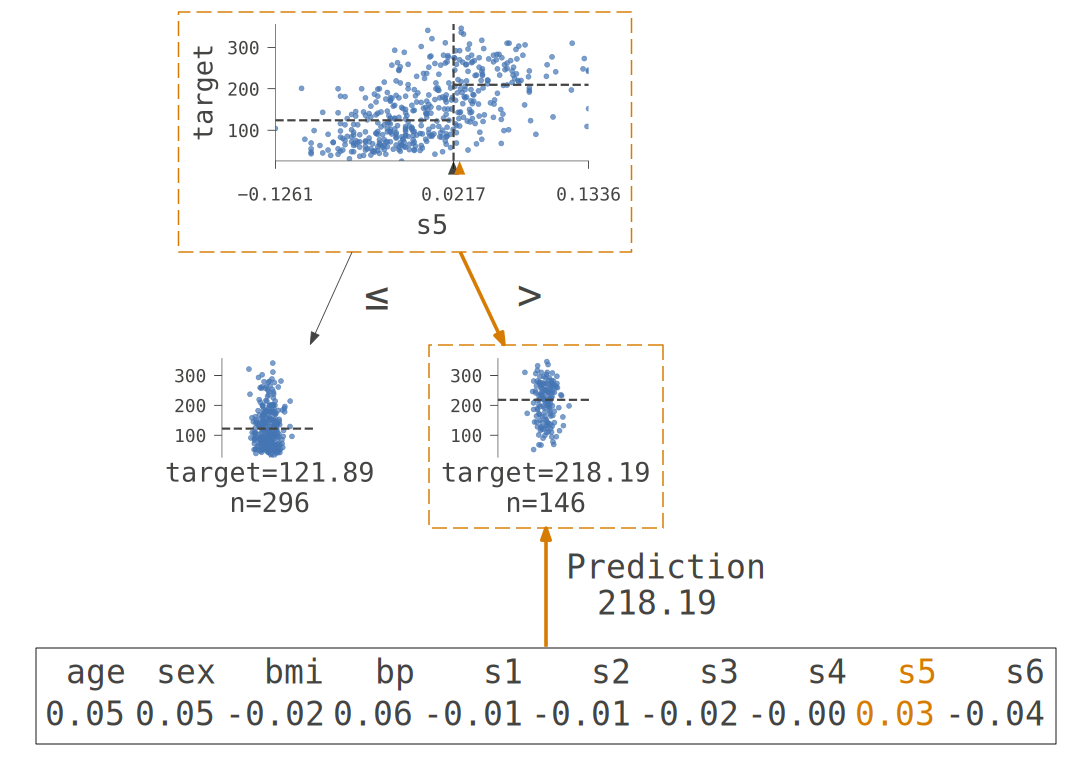

In [58]:
# run time 6.8s

import numpy as np

sample = X_test[np.random.randint(0, len(X_test)),:] # random sample from training

viz = dtreeviz.model(regressor2, X, y,
                target_name="target",
                feature_names=dataset.feature_names)
#viz.view()
viz.view(fontname="monospace", scale=3, x=sample)

**Step 8:** For bigger graphs you just show the decision path

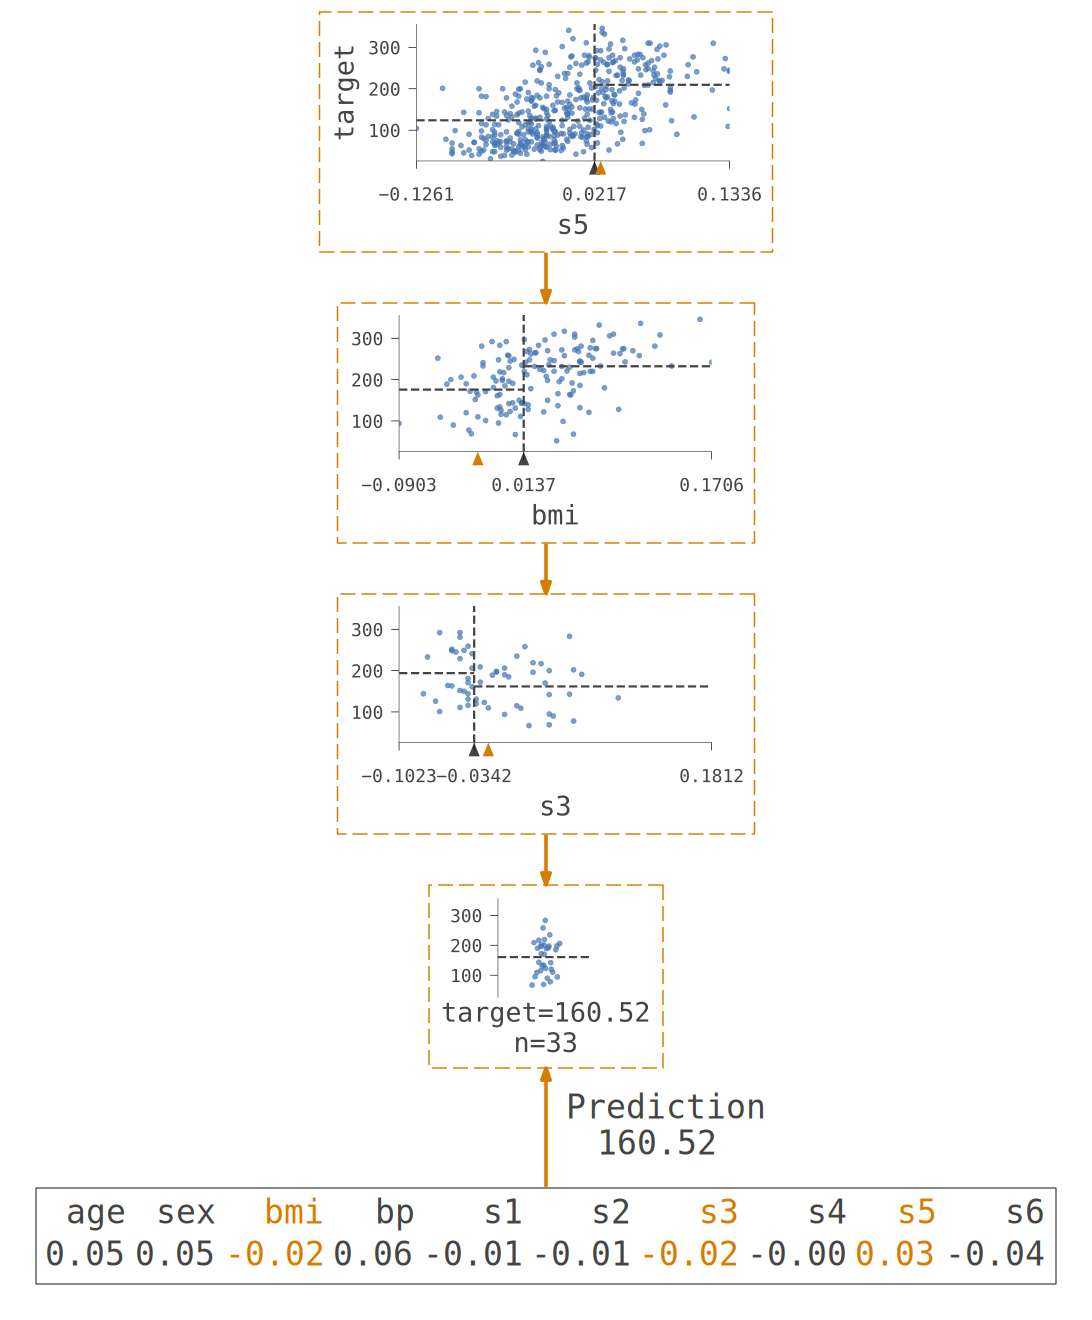

In [59]:
# run time 10.4s

viz = dtreeviz.model(regressor3, X, y,
                target_name="target",
                feature_names=dataset.feature_names)
#viz.view()
viz.view(fontname="monospace", scale=3, x=sample, show_just_path=True)

**Step 9:** Another option to explain the prediction for big trees is this

In [60]:
# run time 0.1s
print(viz.explain_prediction_path(sample))


bmi < 0.01
-0.03 <= s3 
0.02 <= s5 



## Step 10: Pruning

### Cost Complexity Pruning

A smart way of pruning is to use cost complexity pruning. This method is based on the idea that a tree with a lot of nodes is more likely to overfit than a tree with few nodes. Therefore, we can prune the tree by removing nodes that are not important for the prediction. The cost complexity pruning method uses a parameter $\alpha$ to determine how many nodes to remove. It basically is a tradeoff between having a tree with many nodes that has a small total MSE, vs. a tree with fewer nodes but greater total MSE. The following code shows how to use the cost complexity pruning method.

We find the alphas that change the Decision Tree to be "cut down" and we record the worsening of the MSE.

In [61]:
# run time 0.8s

path = regressor1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

We can then plot the MSE for each $\alpha$.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

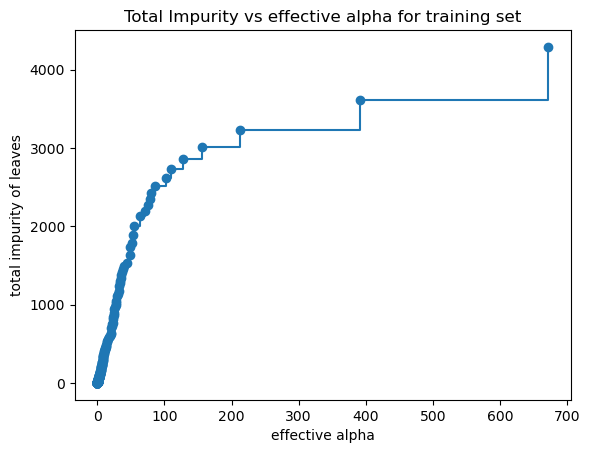

In [62]:
# run time 0.4s

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

- The total impurity of leaves, is the overall randomness of classes or values within nodes in a decision trees. 
- With higher alpha, we have more aggressive pruning leading to a simpler tree with leaves that have higher impurity, because the tree is capturing less information of the training data.
- We use proning in order to simplify our model to decrease overfitting. Proning introduces a regularisation term controlled by hyperparameter "alpha" to balance the tradeoffs between fitting the data and keeping the tree simple.



- Pruning doesn't necesarily increase the total impurity due to that some splits doesn't give you more information gain

You can now train a Decision Tree for each $\alpha$.

In [63]:
# run time 0.2s

regressors = []
for ccp_alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(min_samples_leaf=20, random_state=0, ccp_alpha=ccp_alpha)
    regressor.fit(X_train, y_train)
    regressors.append(regressor)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        regressors[-1].tree_.node_count, ccp_alphas[-1]
    ),
)
if regressors[-1].tree_.node_count == 1:
    print("Removing last node.")
    regressors = regressors[:-1]
    ccp_alphas = ccp_alphas[:-1]

Number of nodes in the last tree is: 1 with ccp_alpha: 1997.0530908365427
Removing last node.


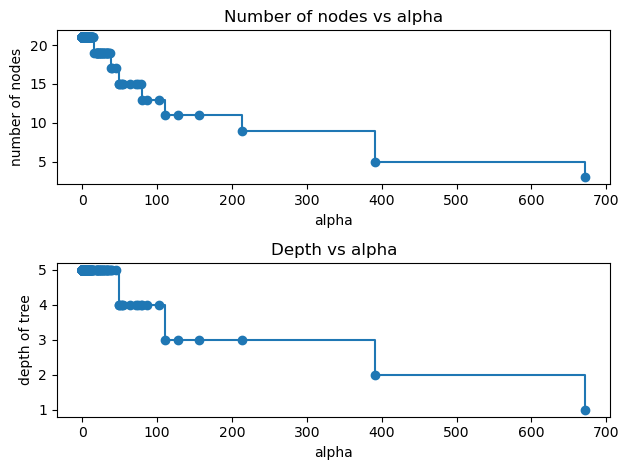

In [64]:
# run time 0.5s

node_counts = [regressor.tree_.node_count for regressor in regressors]
depth = [regressor.tree_.max_depth for regressor in regressors]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- The higher nodes the less alpha, which indicate a more complex tree with lower impurity, more prone to overfitting
- The lower nodes the higher alpha, which creates a simpler tree with higher impurity, less prone to overfitting

This is a way to get all the scores for each tree

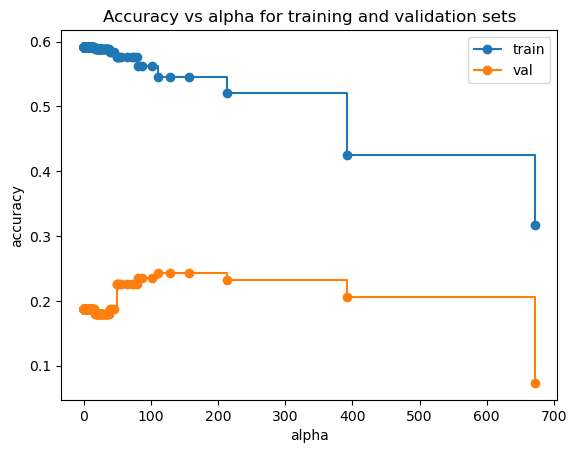

In [65]:
# run time 0.6s

train_scores = [regressor.score(X_train, y_train) for regressor in regressors]
val_scores = [regressor.score(X_val, y_val) for regressor in regressors]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="val", drawstyle="steps-post")
ax.legend()
plt.show()

- As a result of simpler tree, the model may perform worse depending on how large alpha is. It also depends on how complex or large the dataset is

The best tree is the one with the highest score.

In [66]:
# run time 0.8s

idx_max = np.argmax(val_scores)
regressor_best = regressors[idx_max]
print("Best alpha: {}".format(ccp_alphas[idx_max]))

Best alpha: 110.08077212251897


In [67]:
# run time 0.7s

regressor_best.score(X_test, y_test)

0.056088365184336575

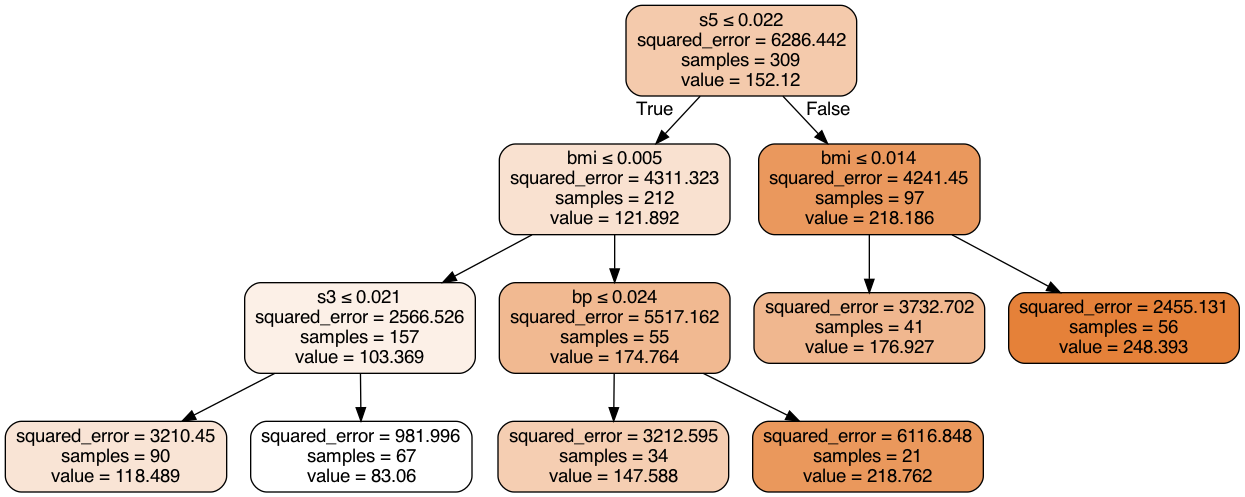

In [68]:
# run time 0.8s

dot_data = tree.export_graphviz(regressor_best, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor_best")
Image("decision_tree_regressor_best.png")

## Step 11: Ensemble methods: 

Experiment with **at least two methods that are not the VotingRegressor**, which is only an example, and that are **NOT random forests**. Inspect the documentation of the different estimators. Note that you can use regressors as estimators within an ensemble that are themselves based on an ensemble. Below is an **example** for a (tiny) voting ensemble. Visualise your results to be able to discuss them!

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got LinearRegression() instead.

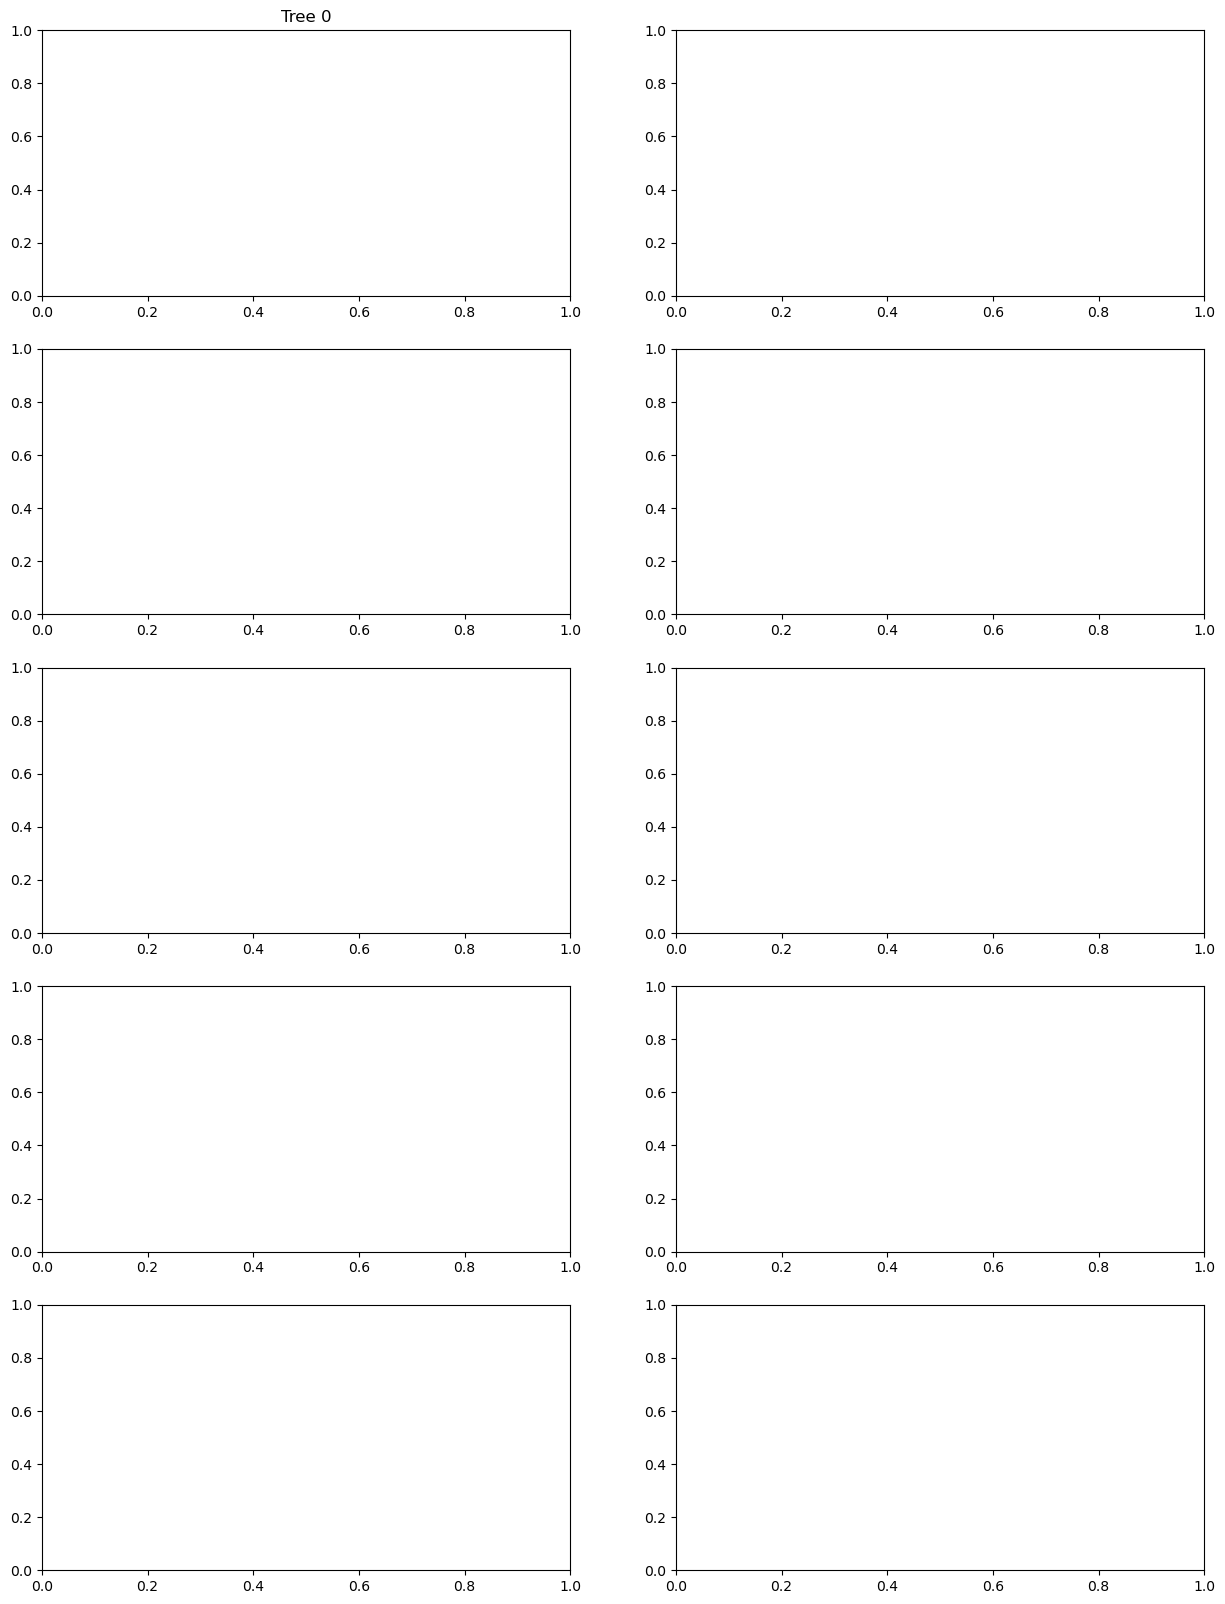

In [123]:
# run time 1.2s

from sklearn.ensemble import (
    VotingRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

voting = VotingRegressor(
    estimators=[
        ("lr", LinearRegression()),
        ("dt", DecisionTreeRegressor()),
        ("rf", GradientBoostingRegressor()),
        ("gb", AdaBoostRegressor()),
    ]
)
voting.fit(X_train, y_train)
voting.score(X_test, y_test)

# IMPLEMENT TWO MORE ENSEMBLE REGRESSORS!
fig, ax = plt.subplots(5, 2, figsize=(15, 20))

for i, axi in enumerate(ax.flat):
    axi.set_title("Tree {}".format(i))
    plot_tree(voting.estimators_[i], ax=axi, filled=True, rounded=True)

fig.tight_layout()
plt.show()


- 0.33 is not so good since 0 indicate that the model is not explaining any variability, while 1 indicate that the model perfectly explains the variability in the target variable.
- Better results than before

## Step 12: Boosting!

Experiment with an AdaBoostRegressor and interpret the results. 

In [124]:
# run time 0.2s

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py
from sklearn.ensemble import AdaBoostRegressor

number_of_trees = 3  # put something suitable in here
boosting = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(), n_estimators=number_of_trees, random_state=0
)
boosting.fit(X_train, y_train)
boosting.score(X_test, y_test)

/Users/patriktao/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


0.7891763603437815

- The AdaBoostRegressor performs worse than a basic model that predicts the mean of the target valuable. This might be due to that AdaboostRegressor is not suited to capture the patterns in the data. The amount of trees might also be too few, making the model too simple, causing underfitting.
- Sequentially train models, giving more weight to the instances that were mispredicted by the previous models. This process helps to focus on the difficult-to-predict instances and improve overall predictive performance.




#### ANSWER:
The score method returns the coefficient of determination R^2 on the test set. It's a measure of how well the model explains the variability in the target variable. The score ranges from -INFINITY to 1, where 
- 1 is a perfect model that explains all the variability in the target variable, 
- 0 indicate that the model doesn't explain any variablity 
- < 0 suggest that the model performs worse than predicting the mean

So -0.138 indicate that the model does not perform very well, and the model way not be complex enough or may be too simple to capture the patterns in the data leading to underfitting. The number of trees might be too simple

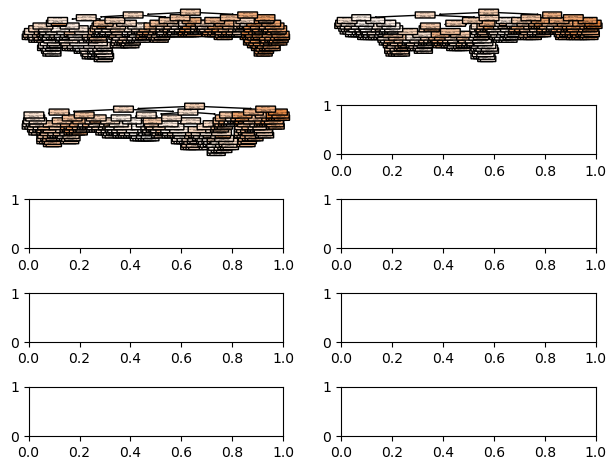

In [71]:
# run time 1m 13s to 3m

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


fig, ax = plt.subplots(5,2)
for i, (tree, feature_importance) in enumerate(zip(boosting.estimators_, boosting.feature_importances_)):
    axi = ax.flat[i]
    axi.set_title("Tree {}".format(i))
    plot_tree(tree, ax=axi, feature_names=dataset.feature_names, filled=True, rounded=True)
fig.tight_layout()

## Step 13: Random Forests

Experiment with different parameters for the RF-Regressor. Test at least two different parameter sets.

number_of_trees (or n_estimators) is a hyperparameter that you can tune to balance the trade-off between model performance and computational efficiency 

In [126]:
from sklearn.ensemble import RandomForestRegressor

number_of_trees = 10
forest = RandomForestRegressor(n_estimators=number_of_trees, random_state=0, max_depth=5, min_samples_leaf=20)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.6520695035158686

In [127]:
import graphviz
import sklearn

for treeid in range(number_of_trees):
    dot_data = sklearn.tree.export_graphviz(forest.estimators_[treeid], feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data, format="png") 
    graph.render("forest_treeid"+str(treeid))

ValueError: Length of feature_names, 10 does not match number of features, 8

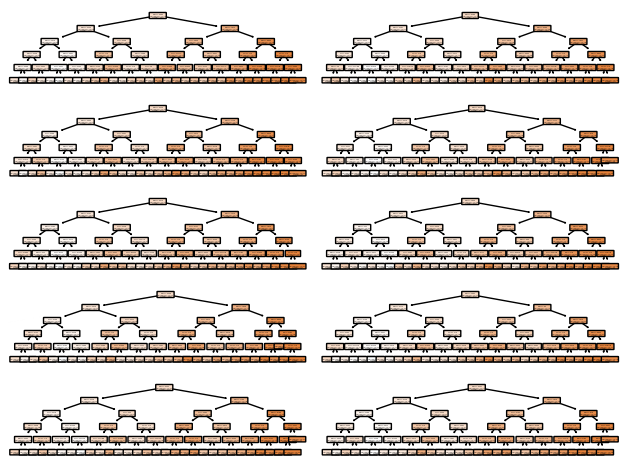

In [128]:
# run time 1m 23s to 3m
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(5,2)
for i, axi in enumerate(ax.flat):
    axi.set_title("Tree {}".format(i))
    plot_tree(forest.estimators_[i], ax=axi, feature_names=dataset.feature_names, filled=True, rounded=True)
fig.tight_layout()